## Boston pricing - Neural Networks tensorflow

Here, we will be using the Boston pricing dataset from tensorflow.keras.datasets and model networks on it.

### Check for GPU

In [1]:
!nvidia-smi

Fri Dec  8 14:06:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Get and load the Boston data

In [2]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [3]:
# Load the dataset
dataset = tf.keras.datasets.boston_housing.load_data(path = 'boston_housing',
                                                     test_split = 0.2,  # splitting the data into 80-20% split
                                                     seed = 42)

57026/57026 [==============================] - 0s 0us/step


In [4]:
# Check the shape of the dataset
len(dataset)

2

In [5]:
# Split the data into train and test splits
(X_train, y_train), (X_test, y_test) = dataset
len(X_train), len(y_train), len(X_test), len(y_test)

(404, 404, 102, 102)

Here, we can see that the data has been splitted into a 80-20% split.

In [6]:
# Checking the shape of the data
X_train[0]

array([9.1780e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01,
       6.4160e+00, 8.4100e+01, 2.6463e+00, 5.0000e+00, 2.9600e+02,
       1.6600e+01, 3.9550e+02, 9.0400e+00])

In [7]:
y_train[:10]

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [8]:
X_test[0], y_test[0]

(array([2.1719e-01, 0.0000e+00, 1.0590e+01, 1.0000e+00, 4.8900e-01,
        5.8070e+00, 5.3800e+01, 3.6526e+00, 4.0000e+00, 2.7700e+02,
        1.8600e+01, 3.9094e+02, 1.6030e+01]),
 22.4)

### Making deep learning models (Doing it sequentially)

#### Baseline model 0 : 2 layers, 100 epochs

In [9]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# settting the random seed
tf.random.set_seed(42)

# Create the model
model_0 = Sequential([
    Dense(100, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(10, activation = 'relu'),
    Dense(1, activation = 'linear')
], name = 'model_0')

# Compile the model
model_0.compile(loss = 'mae',
                optimizer = Adam(),
                metrics = ['mae', 'mse'])

# Fit the model
model_0_history = model_0.fit(X_train, y_train,
                              epochs = 100,
                              verbose = 0,
                              validation_data = (X_test, y_test))

In [11]:
# Model summary
model_0.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 12521 (48.91 KB)
Trainable params: 12521 (48.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# evaluate using the test data
model_0.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 3.7187 - mae: 3.7187 - mse: 36.3252


[3.7187366485595703, 3.7187366485595703, 36.3251838684082]

In [13]:
# Making a function to get model results
def get_model_results(model, test_data):
  X_test, y_test = test_data

  # Predict using the data
  model_preds = tf.squeeze(model.predict(X_test), axis=-1)

  # Get evaluation metrics
  mae = tf.keras.metrics.mae(y_test, model_preds).numpy()
  mse = tf.keras.metrics.mse(y_test, model_preds).numpy()
  rmse = tf.math.sqrt(mse).numpy()

  return {'mae': mae, 'mse': mse, 'rmse': rmse},(model_preds)

In [14]:
# Get results of the model
model_0_results, model_0_preds = get_model_results(model_0, (X_test, y_test))
model_0_results

4/4 [==============================] - 0s 3ms/step


{'mae': 3.7187366, 'mse': 36.325184, 'rmse': 6.0270376}

In [15]:
# Checking the predictions we got
model_0_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.45871 , 24.827505, 18.639963, 25.009354, 19.208332, 19.453182,
       26.266315, 22.755955, 23.87489 , 24.347382], dtype=float32)>

In [16]:
# Plot prediction Vs Actual value
import matplotlib.pyplot as plt
def plot_pred_vs_act(y_true, y_pred, start = 0):
  plt.figure(figsize=(10, 7))
  plt.plot(tf.range(len(y_true))[start:], y_true[start:], label = 'Testing values')
  plt.plot(tf.range(len(y_true))[start:], y_pred[start:], label = 'Prediction values')
  plt.xlabel('Records')
  plt.ylabel('Prices')
  plt.legend()
  plt.grid(True);

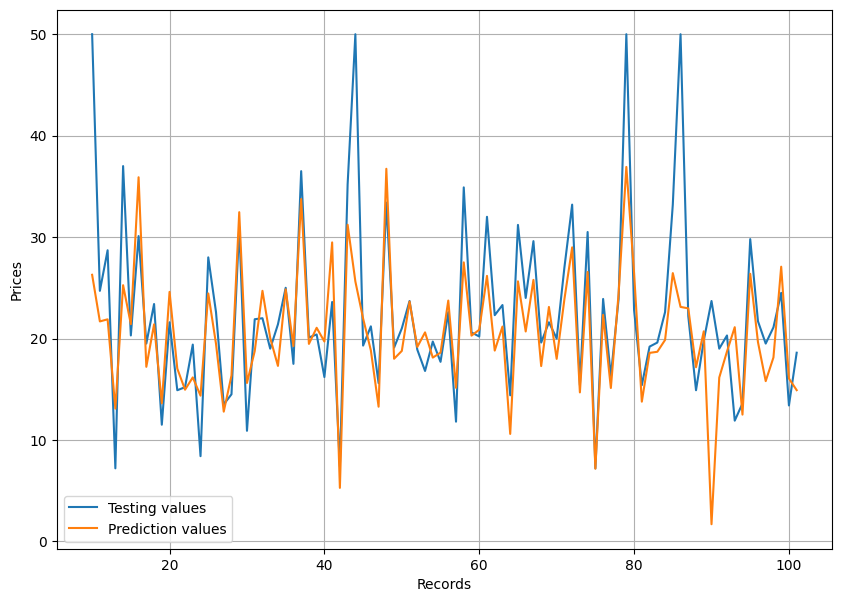

In [17]:
plot_pred_vs_act(y_test, model_0_preds, start = 10)

In [18]:
# Plot the loss function
import pandas as pd
def plot_loss_curves(history, metrics_to_plot = ['loss']):
  for metric in metrics_to_plot:
    plt.figure(figsize=(10, 7))
    plt.plot(pd.DataFrame(history.history[metric]), label = f'Training {metric}')
    plt.plot(pd.DataFrame(history.history['val_' + metric]), label = f'Validation {metric}')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.title(f'Train vs Validation {metric} curves')
    plt.legend();

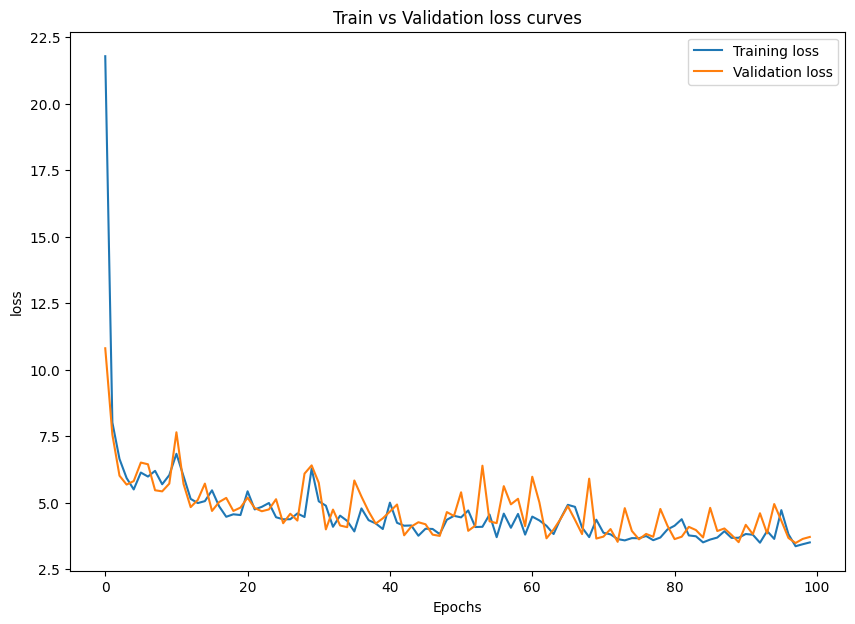

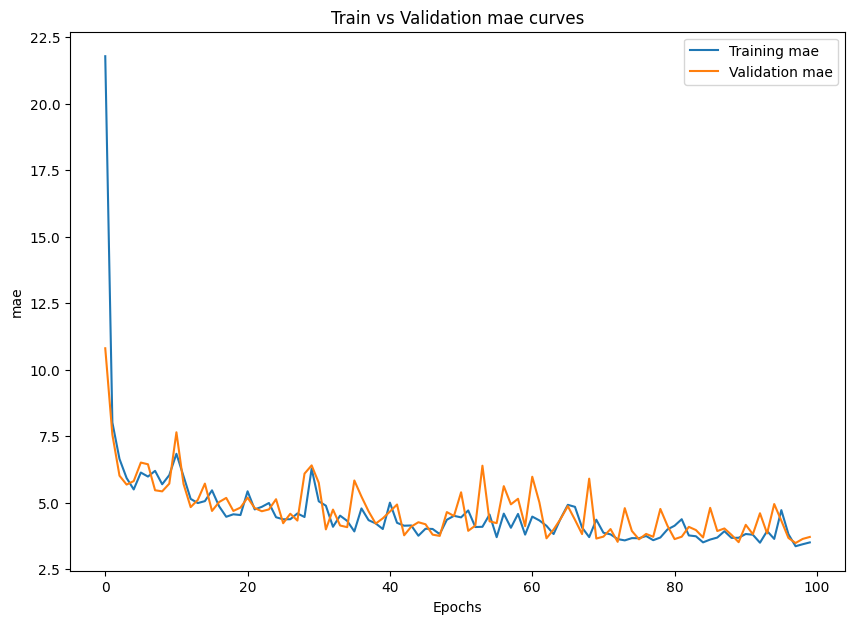

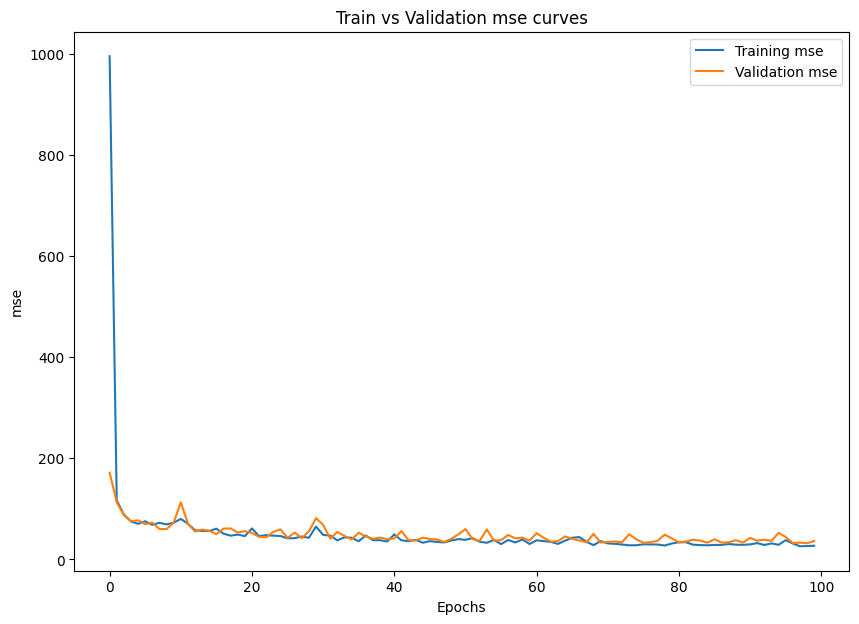

In [19]:
plot_loss_curves(model_0_history, metrics_to_plot = ['loss', 'mae', 'mse'])

In [20]:
model_0_results

{'mae': 3.7187366, 'mse': 36.325184, 'rmse': 6.0270376}

#### Model 1: Training the baseline model, but for 128, 256, 512 epochs and get metrics ; Also use model checkpoint callback

In [21]:
model_1_128 = tf.keras.models.clone_model(model_0)
model_1_256 = tf.keras.models.clone_model(model_0)
model_1_512 = tf.keras.models.clone_model(model_0)

##### Model 1 - 128 epochs

In [22]:
# Compile the model
model_1_128.compile(loss='mae',
                    optimizer = Adam(learning_rate = 0.001),
                    metrics = ['mae','mse'])

# Fit the model
model_1_128_history = model_1_128.fit(X_train, y_train,
                                      epochs = 128,
                                      verbose = 0,
                                      validation_data = (X_test, y_test))

In [23]:
# Evaluate on the test data
model_1_128.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 3.4811 - mae: 3.4811 - mse: 33.5178


[3.481130361557007, 3.481130361557007, 33.51775360107422]

In [24]:
# Get results of the model
model_1_128_results, model_1_128_preds = get_model_results(model_1_128, (X_test, y_test))
model_1_128_results

4/4 [==============================] - 0s 2ms/step


{'mae': 3.4811304, 'mse': 33.517754, 'rmse': 5.7894516}

In [25]:
model_0_results

{'mae': 3.7187366, 'mse': 36.325184, 'rmse': 6.0270376}

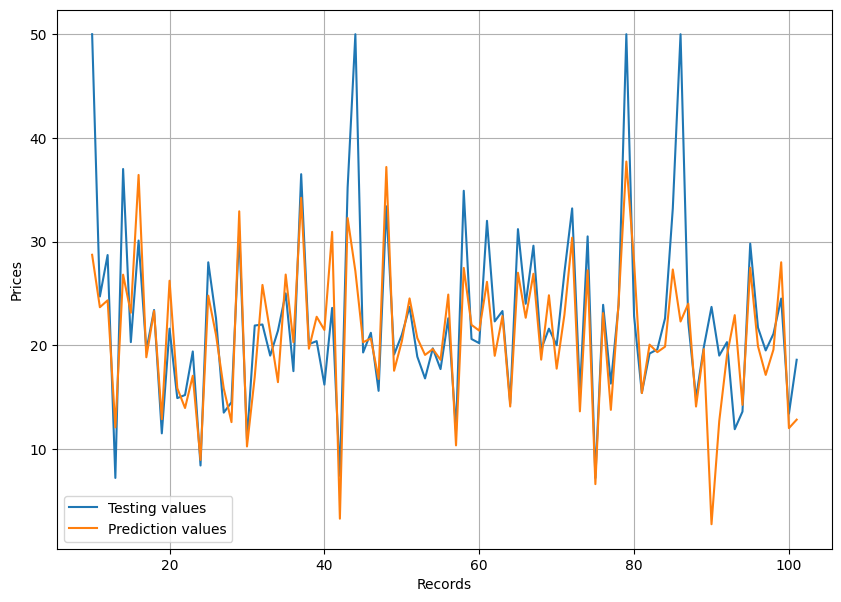

In [26]:
# Plot predictions Vs actual
plot_pred_vs_act(y_test, model_1_128_preds, start = 10)

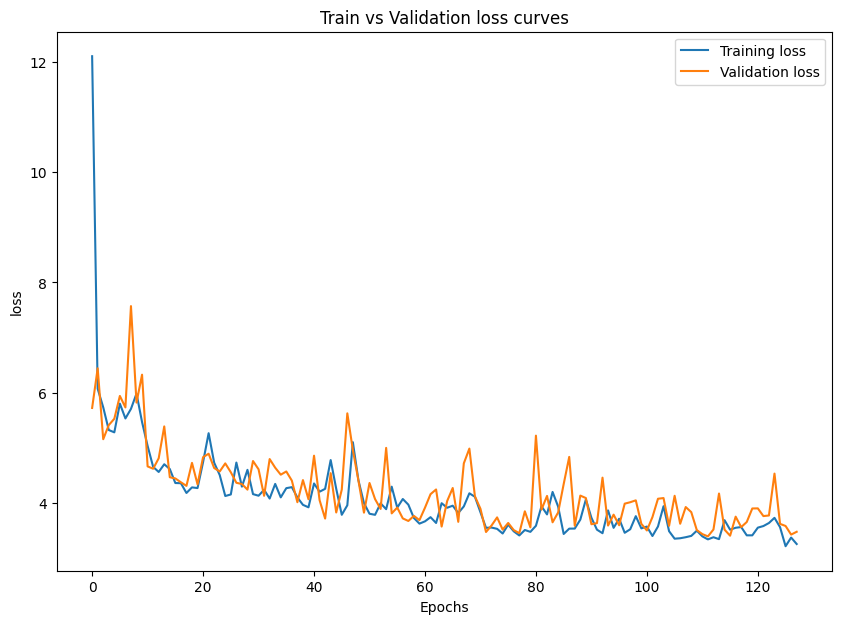

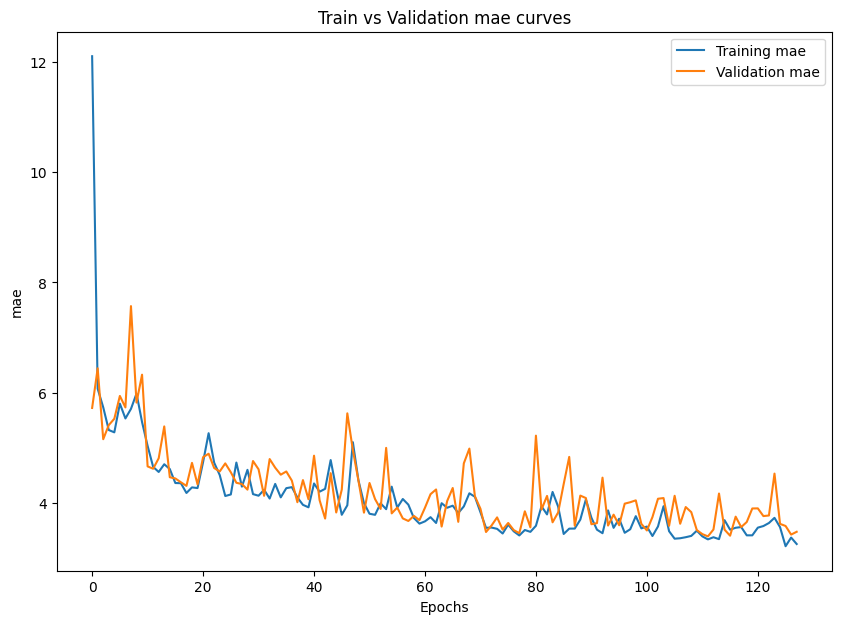

In [27]:
plot_loss_curves(model_1_128_history, metrics_to_plot = ['loss', 'mae'])

##### Model 1 - 256 epochs

In [28]:
# Compile the model
model_1_256.compile(loss='mae',
                    optimizer = Adam(learning_rate = 0.001),
                    metrics = ['mae','mse'])

# Fit the model
model_1_256_history = model_1_256.fit(X_train, y_train,
                                      epochs = 256,
                                      verbose = 0,
                                      validation_data = (X_test, y_test))

In [29]:
# Evaluate on the test data
model_1_256.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 2.6590 - mae: 2.6590 - mse: 15.5473


[2.6590096950531006, 2.6590096950531006, 15.547274589538574]

In [30]:
# Get results of the model
model_1_256_results, model_1_256_preds = get_model_results(model_1_256, (X_test, y_test))
model_1_256_results

4/4 [==============================] - 0s 3ms/step


{'mae': 2.6590097, 'mse': 15.547275, 'rmse': 3.9430032}

In [31]:
model_0_results

{'mae': 3.7187366, 'mse': 36.325184, 'rmse': 6.0270376}

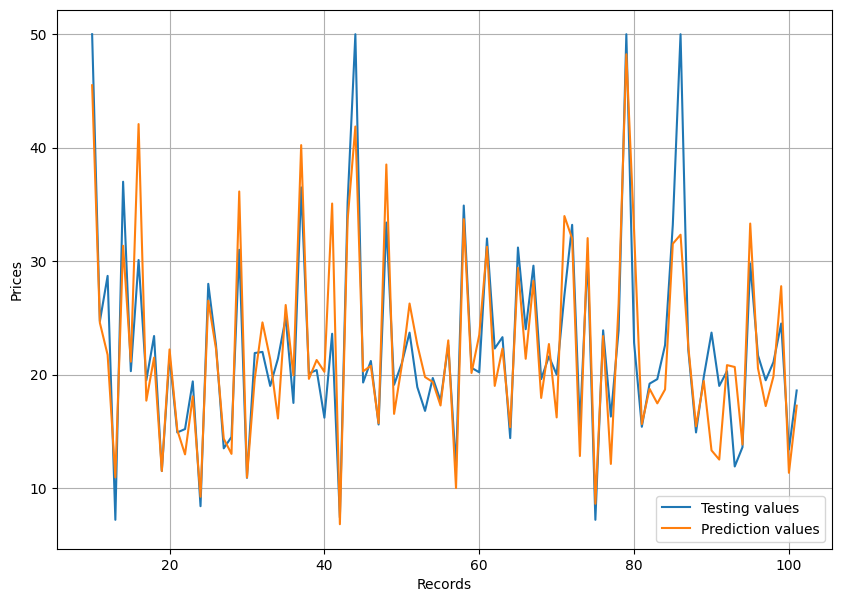

In [32]:
# Plot predictions Vs actual
plot_pred_vs_act(y_test, model_1_256_preds, start = 10)

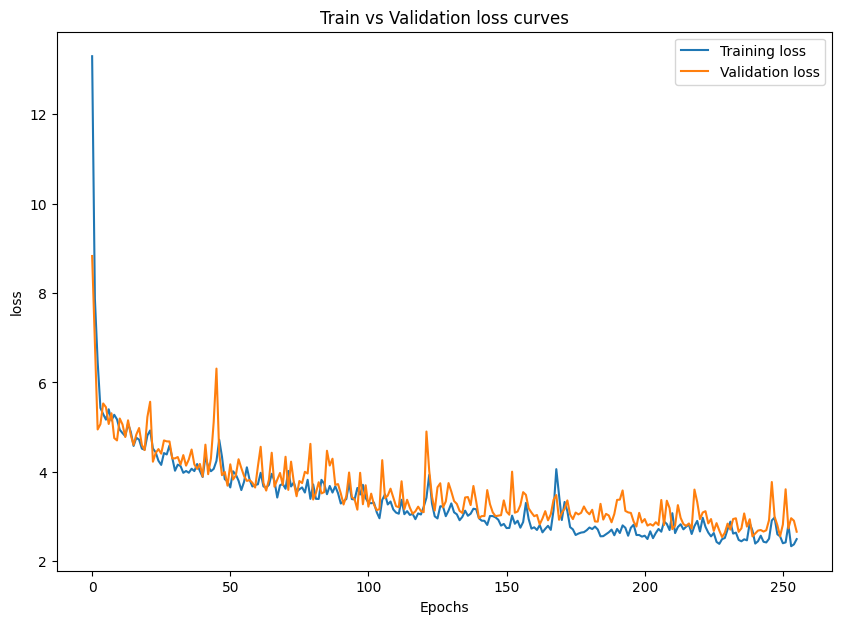

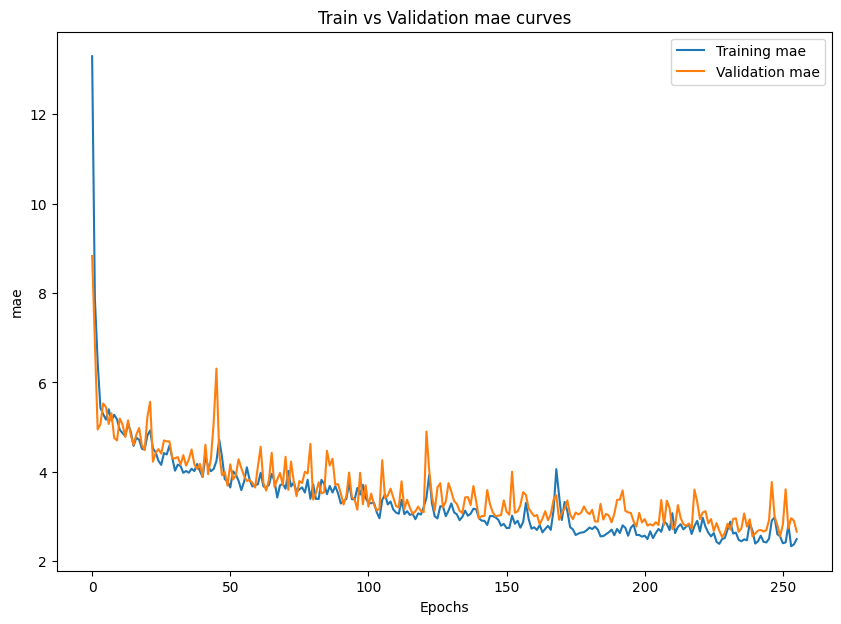

In [33]:
plot_loss_curves(model_1_256_history, metrics_to_plot = ['loss', 'mae'])

##### Model 1 - 512 epochs

In [34]:
# Compile the model
model_1_512.compile(loss='mae',
                    optimizer = Adam(learning_rate = 0.001),
                    metrics = ['mae','mse'])

# Fit the model
model_1_512_history = model_1_512.fit(X_train, y_train,
                                      epochs = 512,
                                      verbose = 0,
                                      validation_data = (X_test, y_test))

In [35]:
# Evaluate on the test data
model_1_512.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 2.8537 - mae: 2.8537 - mse: 17.4511


[2.853731870651245, 2.853731870651245, 17.451087951660156]

In [36]:
# Get results of the model
model_1_512_results, model_1_512_preds = get_model_results(model_1_512, (X_test, y_test))
model_1_512_results

4/4 [==============================] - 0s 4ms/step


{'mae': 2.8537319, 'mse': 17.451088, 'rmse': 4.17745}

In [37]:
model_1_128_results, model_1_256_results

({'mae': 3.4811304, 'mse': 33.517754, 'rmse': 5.7894516},
 {'mae': 2.6590097, 'mse': 15.547275, 'rmse': 3.9430032})

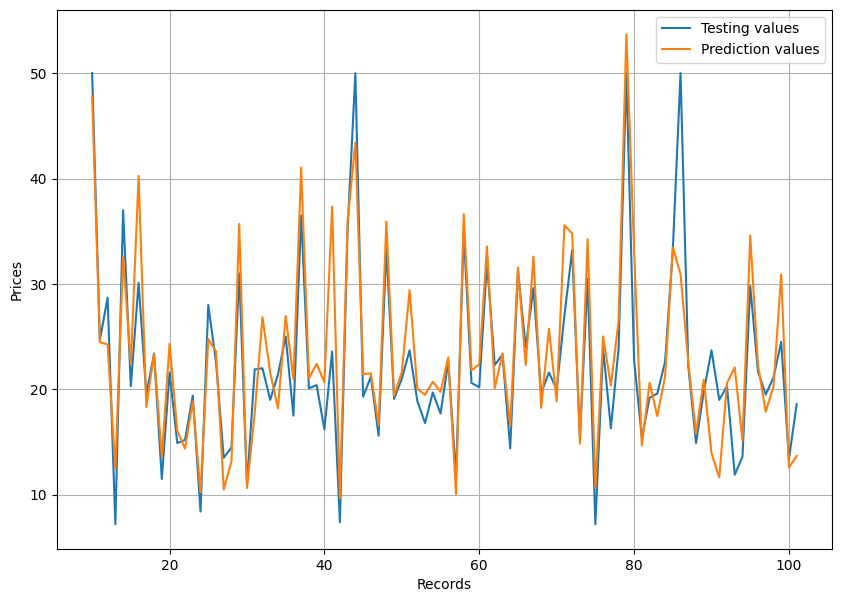

In [38]:
# Plot predictions Vs actual
plot_pred_vs_act(y_test, model_1_512_preds, start = 10)

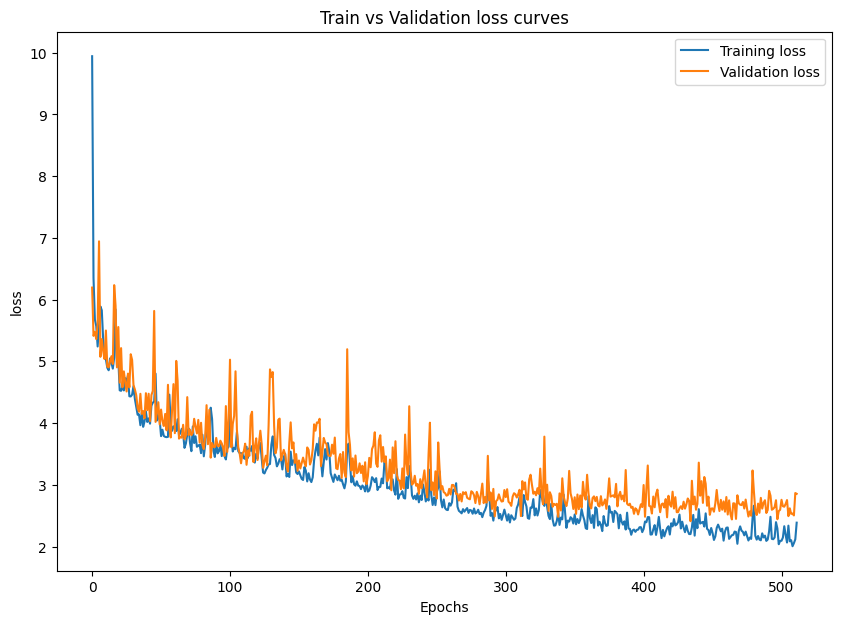

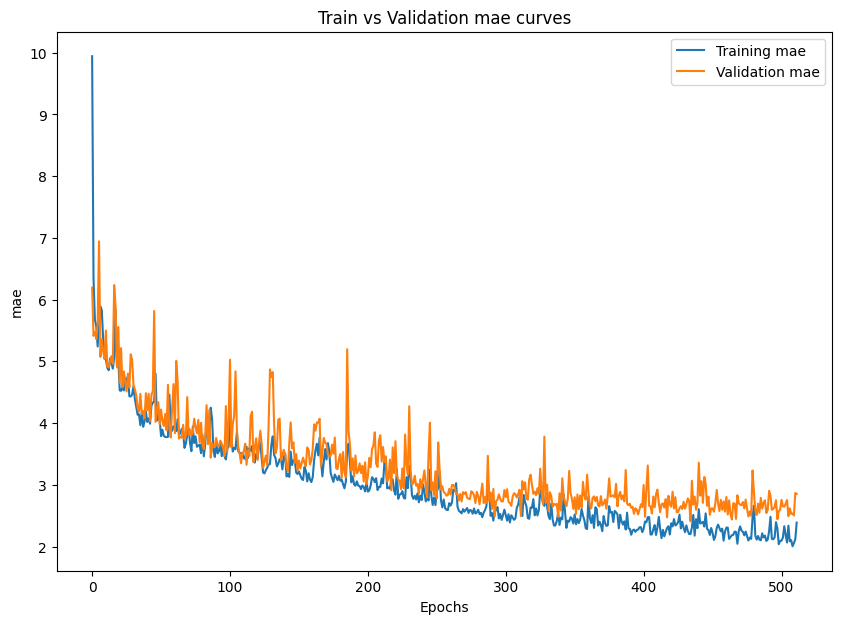

In [39]:
plot_loss_curves(model_1_512_history, metrics_to_plot = ['loss', 'mae'])

In [40]:
# Making a function to fit the model at different epochs and get the best model metrics
def get_good_model(model,
                   train_data, test_data,
                   compile_loss = 'mae',
                   epoch_list:list = [64,128,256,512]):
  model_list = {}
  model_results = {}
  model_historys = {}
  model_preds = {}
  for epoch in epoch_list:
    model_ep = tf.keras.models.clone_model(model)

    # Compile the model
    model_ep.compile(loss=compile_loss,
                     optimizer = Adam(),
                     metrics=['mae', 'mse'])

    # Fit the model
    model_ep_history = model_ep.fit(train_data[0], train_data[1],
                                    epochs = epoch,
                                    validation_data = test_data,
                                    verbose = 0)
    model_historys[f'{model.name}_{epoch}'] = model_ep_history
    print(f'Model has been trained on {epoch} epochs.')

    # Get evaluation results of the model
    print(f'Evaluating the model on test data')
    model_ep_results, model_ep_preds = get_model_results(model_ep, test_data)

    model_results[f'{model.name}_{epoch}'] = model_ep_results
    model_preds[f'{model.name}_{epoch}'] = model_ep_preds
    model_list[f'{model.name}_{epoch}'] = model_ep

  model_results = pd.DataFrame(model_results).T.sort_values(['mae', 'mse', 'rmse'],
                                                          ascending = [True, True, True])

  return model_list, model_results, model_historys, model_preds

#### Model 2: Do same as model_1 (use get_good_model function)

In [41]:
model_2 = tf.keras.models.clone_model(model_0)
model_2._name = 'model_2'

# Compile the model
model_2.compile(loss='mae',
                optimizer = Adam(),
                metrics = ['mae', 'mse'])

In [42]:
model_lst, model_results, model_historys, model_preds = get_good_model(model_2,
                                                            (X_train, y_train),
                                                            (X_test, y_test),
                                                            epoch_list = [64,128,256,512])

Model has been trained on 64 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 5ms/step
Model has been trained on 128 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step
Model has been trained on 256 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step
Model has been trained on 512 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step


In [43]:
model_results

,mae,mse,rmse
model_2_512,2.903576,15.801090,3.975059
model_2_128,3.132704,21.598602,4.647429
model_2_256,3.598959,23.038630,4.799857
model_2_64,4.650502,39.301083,6.269057


In [44]:
model_2 = model_lst['model_2_256']
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 12521 (48.91 KB)
Trainable params: 12521 (48.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model_2_results = model_results.iloc[0]
model_2_results

mae      2.903576
mse     15.801090
rmse     3.975059
Name: model_2_512, dtype: float32

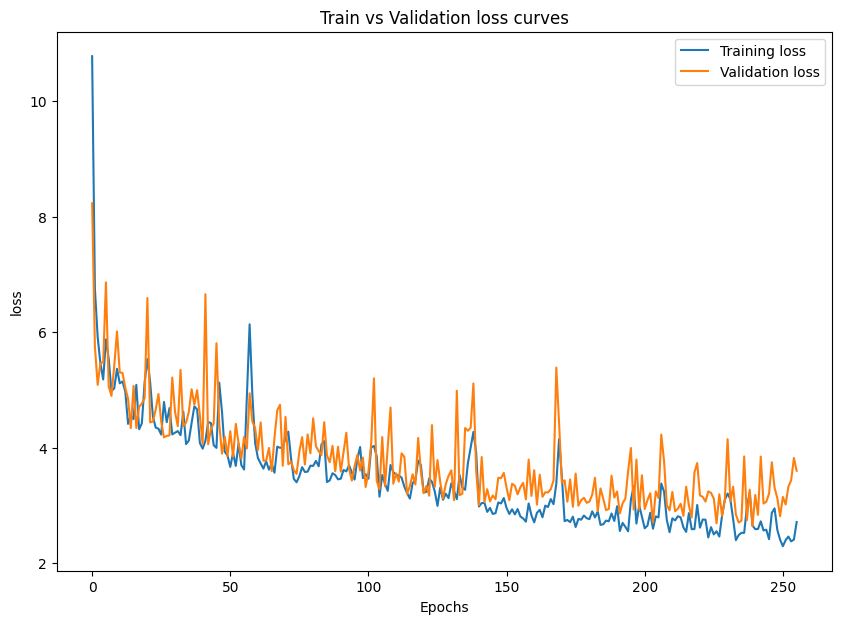

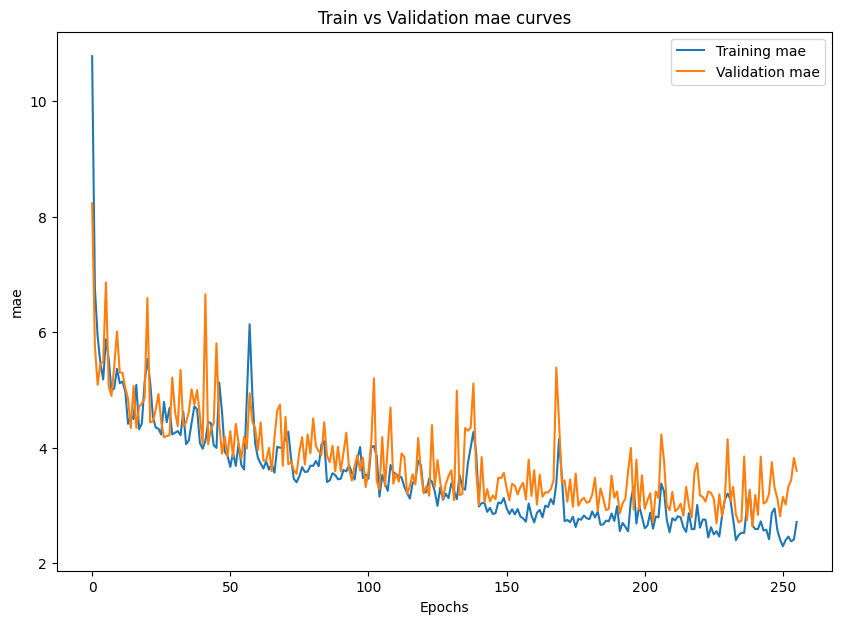

In [46]:
# Plot loss curves
model_2_history = model_historys['model_2_256']
plot_loss_curves(model_2_history, metrics_to_plot = ['loss', 'mae'])

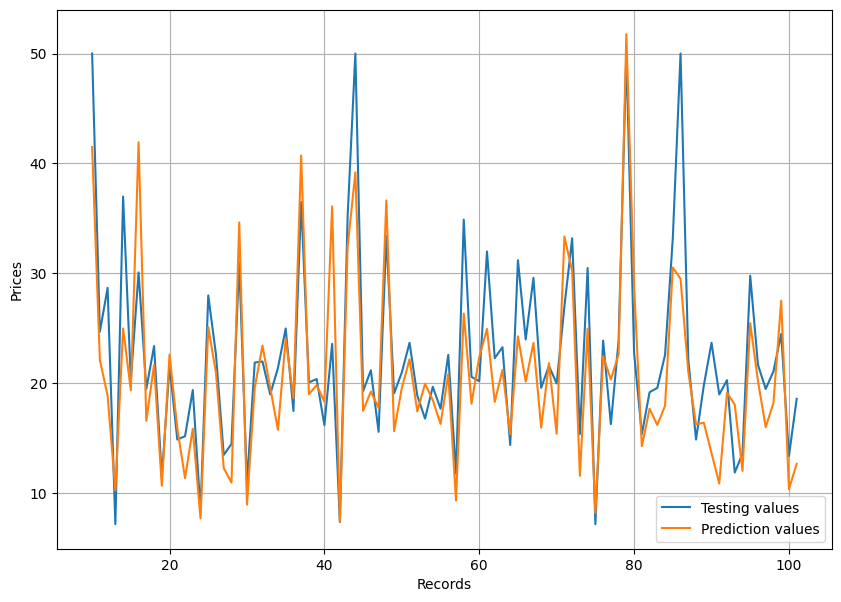

In [47]:
# Plot predictions Vs actual
plot_pred_vs_act(y_test, model_preds['model_2_256'], start = 10)

#### Model 3: same model 0, same process as model 2, but get best weights model

In [48]:
# Making a function to fit the model at different epochs and get the best weight
# model metrics

def create_model_checkpoint(save_path = 'model_exp'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=save_path,
                                            monitor = 'val_loss',
                                            save_best_only = True,
                                            verbose = 0)


def get_best_wt_model(model,
                      train_data, test_data,
                      compile_loss = 'mae',
                      epoch_list:list = [64,128,256,512]):
  # set random seed
  tf.random.set_seed(42)

  model_list = {}
  model_results = {}
  model_historys = {}
  model_preds = {}
  for epoch in epoch_list:
    MODEL_PATH = f'model_exp/{model.name}/{model.name}_{epoch}'
    model_ep = tf.keras.models.clone_model(model)

    # Compile the model
    model_ep.compile(loss=compile_loss,
                     optimizer = Adam(),
                     metrics=['mae', 'mse'])

    # Fit the model
    model_ep_history = model_ep.fit(train_data[0], train_data[1],
                                    epochs = epoch,
                                    validation_data = test_data,
                                    verbose = 0,
                                    callbacks = [create_model_checkpoint(
                                        save_path = MODEL_PATH
                                    )])

    model_historys[f'{model.name}_{epoch}'] = model_ep_history
    print(f'Model has been trained on {epoch} epochs.')

    model_ep = tf.keras.models.load_model(MODEL_PATH)

    # Get evaluation results of the model
    print(f'Evaluating the model on test data')
    model_ep_results, model_ep_preds = get_model_results(model_ep, test_data)

    model_results[f'{model.name}_{epoch}'] = model_ep_results
    model_preds[f'{model.name}_{epoch}'] = model_ep_preds
    model_list[f'{model.name}_{epoch}'] = model_ep
    print()

  model_results = pd.DataFrame(model_results).T.sort_values(['mae', 'mse', 'rmse'],
                                                          ascending = [True, True, True])

  return model_list, model_results, model_historys, model_preds

In [49]:
# Clone model 0
model_3 = tf.keras.models.clone_model(model_0)
model_3.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 12521 (48.91 KB)
Trainable params: 12521 (48.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# Get best weighted model results
model_lst_3, model_results_3, model_historys_3, model_preds_3 = get_best_wt_model(model_3,
                                                                       (X_train, y_train),
                                                                       (X_test, y_test),
                                                                       epoch_list = [64,128,256,512])

Model has been trained on 64 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step

Model has been trained on 128 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step

Model has been trained on 256 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step

Model has been trained on 512 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step



In [51]:
model_results_3

,mae,mse,rmse
model_0_512,2.474564,14.309172,3.782747
model_0_256,2.546901,16.073147,4.009133
model_0_128,3.368288,31.042055,5.571540
model_0_64,3.690775,34.946941,5.911594


In [52]:
model_2_results

mae      2.903576
mse     15.801090
rmse     3.975059
Name: model_2_512, dtype: float32

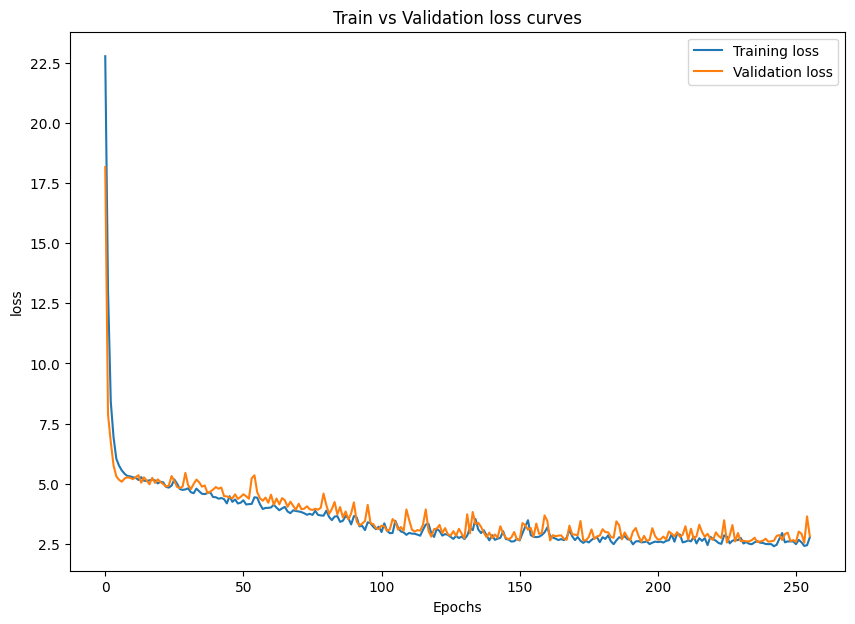

In [53]:
# Plot loss curves
model_3_history = model_historys_3['model_0_256']
plot_loss_curves(model_3_history, metrics_to_plot = ['loss'])

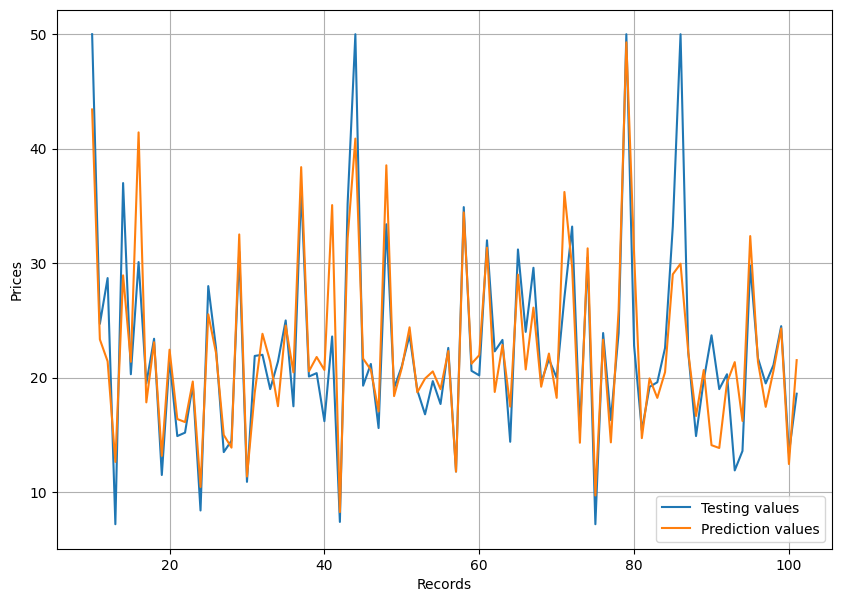

In [54]:
# Plot predictions Vs actual
plot_pred_vs_act(y_test, model_preds_3['model_0_256'], start = 10)

#### Normalizing the data

In [55]:
from sklearn.preprocessing import MinMaxScaler

MN_scaler = MinMaxScaler()
MN_scaler.fit(X_train)

# Now, transform the train and test data
X_train_norm = MN_scaler.transform(X_train)
X_test_norm = MN_scaler.transform(X_test)

In [56]:
# Checking the data
X_train_norm[0], X_test_norm[0]

(array([9.60549795e-04, 0.00000000e+00, 1.31598240e-01, 0.00000000e+00,
        2.57201646e-01, 5.47039663e-01, 8.36251287e-01, 1.37340188e-01,
        1.73913043e-01, 2.08015267e-01, 4.25531915e-01, 9.96469817e-01,
        1.97503467e-01]),
 array([0.00237013, 0.        , 0.37133431, 1.        , 0.21399177,
        0.43035064, 0.52420185, 0.22890941, 0.13043478, 0.17175573,
        0.63829787, 0.98497151, 0.39140083]))

#### Model 4: Same as baseline, but with normalised data

In [57]:
model_4 = tf.keras.models.clone_model(model_0)
model_4._name = 'model_4'
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 12521 (48.91 KB)
Trainable params: 12521 (48.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# Get best weighted model results
model_lst_4, model_results_4, model_historys_4, model_preds_4 = get_best_wt_model(model_4,
                                                                       (X_train_norm, y_train),
                                                                       (X_test_norm, y_test),
                                                                       epoch_list = [64,128,256,512])

Model has been trained on 64 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step

Model has been trained on 128 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step

Model has been trained on 256 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 2ms/step

Model has been trained on 512 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step



In [59]:
model_results_4

,mae,mse,rmse
model_4_512,2.128335,9.082347,3.013693
model_4_128,2.334079,15.266270,3.907207
model_4_256,2.354788,13.690980,3.700132
model_4_64,2.533423,18.358845,4.284722


In [60]:
model_4_results = model_results_4.iloc[0]
model_4_results

mae     2.128335
mse     9.082347
rmse    3.013693
Name: model_4_512, dtype: float32

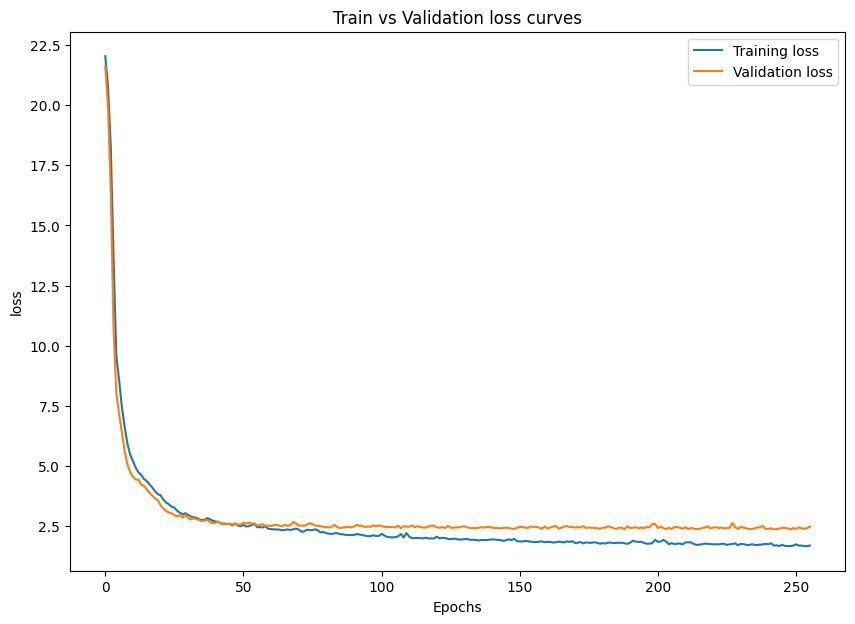

In [61]:
# Plot loss curves
model_4_history = model_historys_4['model_4_256']
plot_loss_curves(model_4_history, metrics_to_plot = ['loss'])

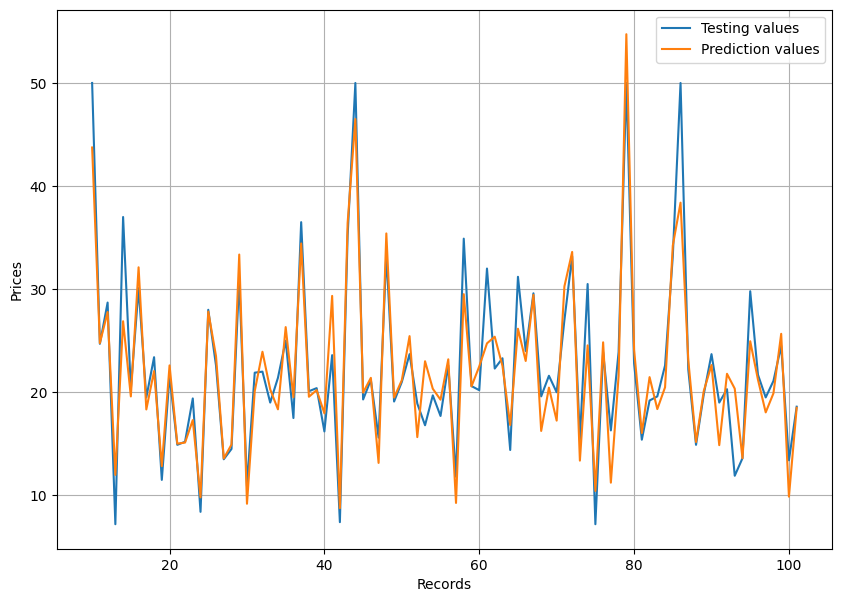

In [62]:
# Plot predictions Vs actual
plot_pred_vs_act(y_test, model_preds_4['model_4_512'], start = 10)

#### Model 5: Bigger model with more layers, done for same number of epochs as model 4, with model checkpoint

##### On `not normalized` data

In [63]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_5 = Sequential([
    Dense(13, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'linear'),
], name = 'model_5')

# Compile the model
model_5.compile(loss='mae',
                optimizer = Adam(),
                metrics = ['mae', 'mse'])

In [64]:
# Get best weighted model results
model_lst_5, model_results_5, model_historys_5, model_preds_5 = get_best_wt_model(model_5,
                                                                       (X_train, y_train),
                                                                       (X_test, y_test),
                                                                       epoch_list = [64,128,256,512])

Model has been trained on 64 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step

Model has been trained on 128 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step

Model has been trained on 256 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step

Model has been trained on 512 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step



In [65]:
# Get model results
model_results_5

,mae,mse,rmse
model_5_512,2.638553,17.055367,4.129814
model_5_128,2.829963,19.724628,4.441242
model_5_256,2.882055,20.322983,4.508102
model_5_64,3.961123,42.195557,6.495811


In [66]:
model_5 = model_lst_5['model_5_512']
model_5_results = model_results_5.iloc[0]
model_5_results

mae      2.638553
mse     17.055367
rmse     4.129814
Name: model_5_512, dtype: float32

In [67]:
# Evaluation results on train data
model_5.evaluate(X_train, y_train)

13/13 [==============================] - 0s 3ms/step - loss: 2.3399 - mae: 2.3399 - mse: 11.9862


[2.339858055114746, 2.339858055114746, 11.986160278320312]

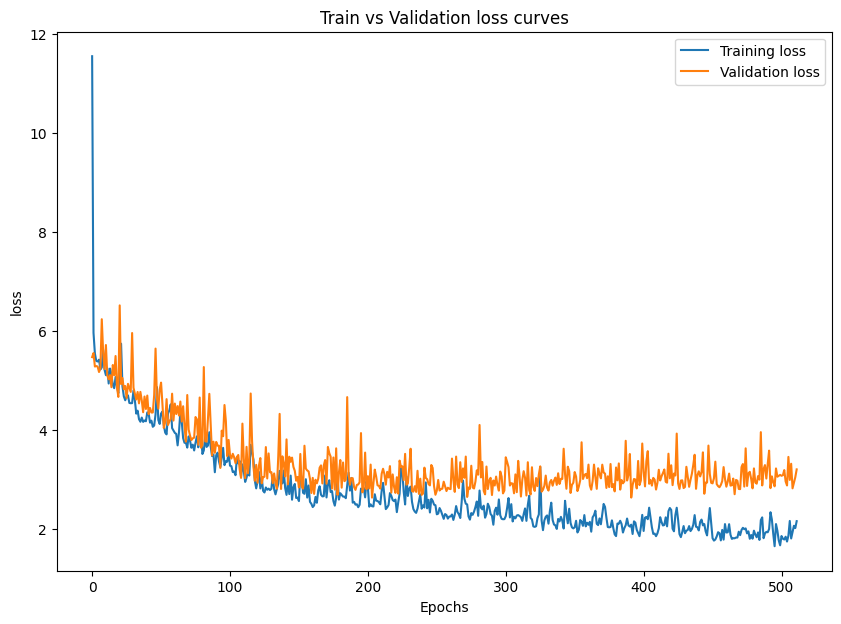

In [68]:
# Plot loss curves
model_5_history = model_historys_5['model_5_512']
plot_loss_curves(model_5_history, metrics_to_plot = ['loss'])

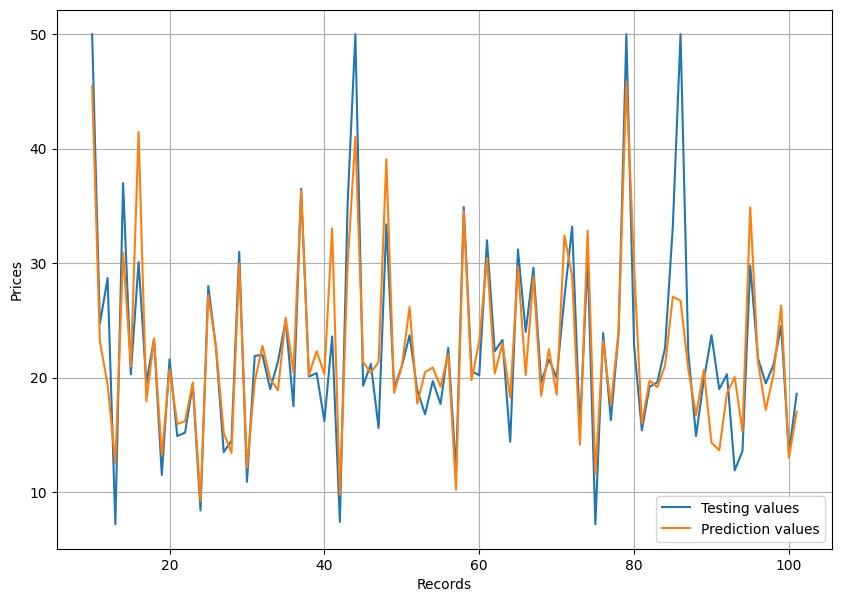

In [69]:
# Plot predictions Vs actual
plot_pred_vs_act(y_test, model_preds_5['model_5_512'], start = 10)

##### On `normalized` data

In [70]:
model_5_norm = tf.keras.models.clone_model(model_5)
model_5_norm._name = 'model_5_norm'
model_5_norm.summary()

Model: "model_5_norm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 13)                182       
                                                                 
 dense_5 (Dense)             (None, 32)                448       
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)               

In [71]:
# Get best weighted model results
model_lst_5_norm, model_results_5_norm, model_historys_5_norm, model_preds_5_norm = get_best_wt_model(model_5_norm,
                                                                       (X_train_norm, y_train),
                                                                       (X_test_norm, y_test),
                                                                       epoch_list = [64,128,256,512])

Model has been trained on 64 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step

Model has been trained on 128 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step

Model has been trained on 256 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step

Model has been trained on 512 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step



In [72]:
model_results_5_norm

,mae,mse,rmse
model_5_norm_512,2.018294,9.612711,3.100437
model_5_norm_256,2.236508,10.976247,3.313042
model_5_norm_128,2.713506,20.352987,4.511428
model_5_norm_64,2.728179,22.019119,4.692453


In [73]:
model_5_norm = model_lst_5_norm['model_5_norm_256']
model_5_results_norm = model_results_5_norm.iloc[0]
model_5_results_norm

mae     2.018294
mse     9.612711
rmse    3.100437
Name: model_5_norm_512, dtype: float32

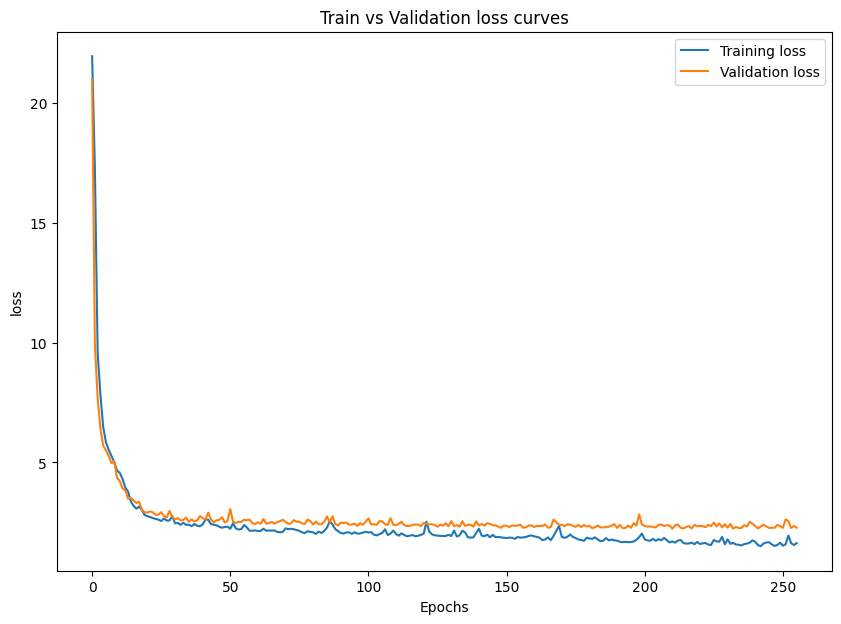

In [74]:
# Plot loss curves
model_5_history_norm = model_historys_5_norm['model_5_norm_256']
plot_loss_curves(model_5_history_norm, metrics_to_plot = ['loss'])

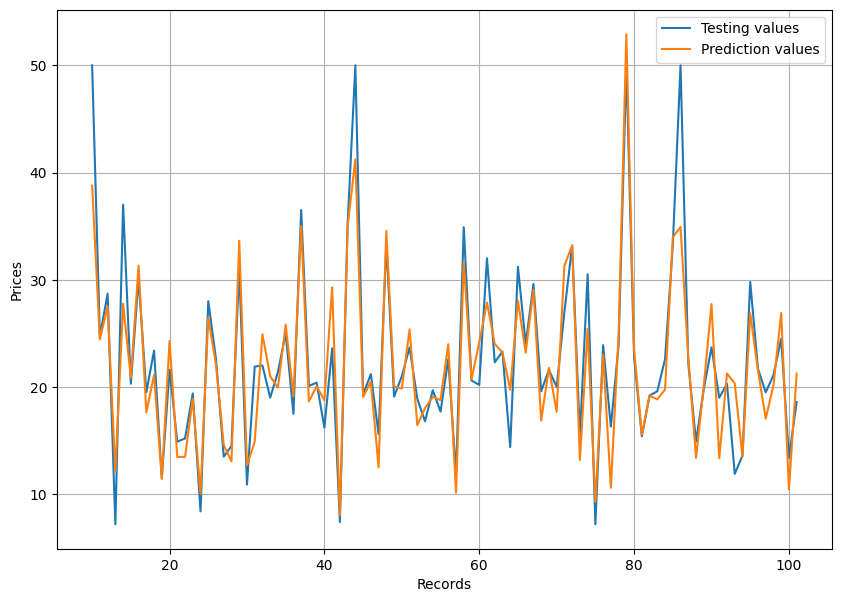

In [75]:
# Plot predictions Vs actual
plot_pred_vs_act(y_test, model_preds_5_norm['model_5_norm_256'], start = 10)

#### Model 6: Same experiment as model 5, but with LRrateScheduler only, and on normalised data

In [76]:
model_6 = tf.keras.models.clone_model(model_5)
model_6._name = 'model_6'
model_6.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 13)                182       
                                                                 
 dense_5 (Dense)             (None, 32)                448       
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080

In [135]:
# Change the get_best_weigth_model, to incorporate LR rate scheduler
# Making a function to fit the model at different epochs and get the best weight
# model metrics

def create_model_checkpoint(save_path = 'model_exp'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=save_path,
                                            monitor = 'val_loss',
                                            save_best_only = True,
                                            verbose = 0)

def create_lr_scheduler(epoch=80, schedule='', custom=False):
  gen_schedule = (lambda epochs: 1e-5 * 10 ** (epochs / int(epoch*0.25)))
  return tf.keras.callbacks.LearningRateScheduler(schedule if custom else gen_schedule,
                                                  verbose = 0)

def create_early_stopping(patience = 32):
  return tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                          patience = patience,
                                          verbose = 0,
                                          mode = 'min',
                                          restore_best_weights=True)

def get_best_model(model,
                   train_data, test_data,
                   compile_loss = 'mae',
                   epoch_list:list = [64,128,256,512],
                   checkpt = True,
                   lr_schedule = False, lr_cust_schedule = None,
                   earlystop = False):

  # set random seed
  tf.random.set_seed(42)

  model_list = {}
  model_results = {}
  model_historys = {}
  model_preds = {}

  for epoch in epoch_list:
    MODEL_PATH = f'model_exp/{model.name}/{model.name}_{epoch}'
    model_ep = tf.keras.models.clone_model(model)

    # Get the model checkpoint
    callbacks = [create_model_checkpoint(save_path = MODEL_PATH)] if checkpt else []

    # Get Early stopping callback
    if earlystop:
      callbacks = [create_early_stopping(patience=epoch*0.20)]

    # Get the learning rate scheduler
    if lr_schedule and epoch>200:
        callbacks += [create_lr_scheduler(schedule = lr_cust_schedule,
                                          epoch = epoch,
                                          custom = True)
        ] if lr_cust_schedule else [create_lr_scheduler(epoch)]


    # Compile the model
    model_ep.compile(loss=compile_loss,
                     optimizer = Adam(),
                     metrics=['mae', 'mse'])

    # Fit the model
    model_ep_history = model_ep.fit(train_data[0], train_data[1],
                                    epochs = epoch,
                                    validation_data = test_data,
                                    verbose = 0,
                                    callbacks = callbacks)

    model_historys[f'{model.name}_{epoch}'] = model_ep_history
    print(f'Model has been trained on {epoch} epochs.')

    # Check if ModelCheckpoint callback done or not
    if checkpt:
      model_ep = tf.keras.models.load_model(MODEL_PATH)

    # Get evaluation results of the model
    print(f'Evaluating the model on test data')
    model_ep_results, model_ep_preds = get_model_results(model_ep, test_data)

    model_results[f'{model.name}_{epoch}'] = model_ep_results
    model_preds[f'{model.name}_{epoch}'] = model_ep_preds
    model_list[f'{model.name}_{epoch}'] = model_ep
    print()

  model_results = pd.DataFrame(model_results).T.sort_values(['mae', 'mse', 'rmse'],
                                                          ascending = [True, True, True])

  return model_list, model_results, model_historys, model_preds

In [98]:
# Get best weighted model results
model_lst_6, model_results_6, model_historys_6, model_preds_6 = get_best_wt_model(model_6,
                                                                                  (X_train_norm, y_train),
                                                                                  (X_test_norm, y_test),
                                                                                  epoch_list = [64,128,256,512],
                                                                                  lr_schedule = True,
                                                                                  checkpt = False
                                                                                  )

Model has been trained on 64 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step

Model has been trained on 128 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step

Model has been trained on 256 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step

Model has been trained on 512 epochs.
Evaluating the model on test data
4/4 [==============================] - 0s 3ms/step



In [99]:
model_results_6

,mae,mse,rmse
model_6_128,2.325146,14.177885,3.765353
model_6_64,2.765175,15.988071,3.998509
model_6_512,2.852046,17.395327,4.170771
model_6_256,3.304489,27.709427,5.263974


In [105]:
model_6 = model_lst_6['model_6_128']
model_6_results = model_results_6.iloc[0]
model_6_results

mae      2.325146
mse     14.177885
rmse     3.765353
Name: model_6_128, dtype: float32

In [102]:
# Make function to plot learning rate Vs Loss
import numpy as np
def plot_lr_loss(history, lrs):
  plt.semilogx(lrs, history.history['loss'])
  plt.xlabel('Learning Rate')
  plt.ylabel('Loss')
  plt.title('Loss Vs Learning rate')
  plt.axis(True);

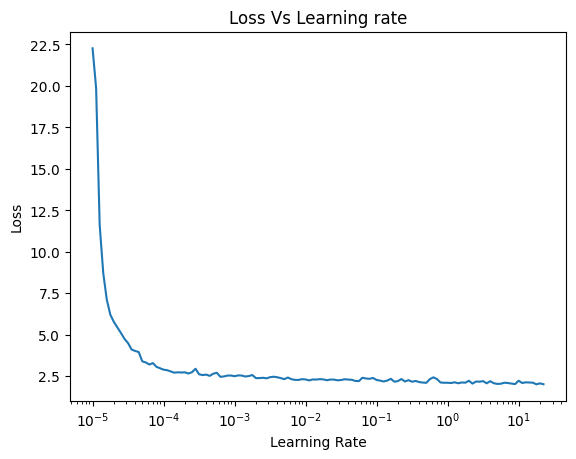

In [107]:
import numpy as np
lrs = 1e-5 * (10**(np.arange(128)/20))
plot_lr_loss(model_historys_6['model_6_128'], lrs)

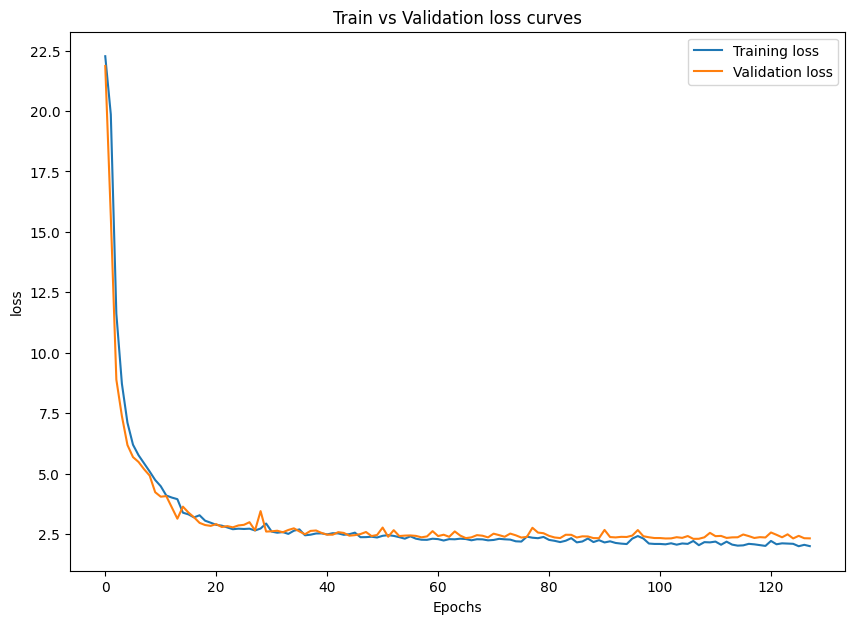

In [108]:
# Plot loss curves
model_6_history_norm = model_historys_6['model_6_128']
plot_loss_curves(model_6_history_norm, metrics_to_plot = ['loss'])

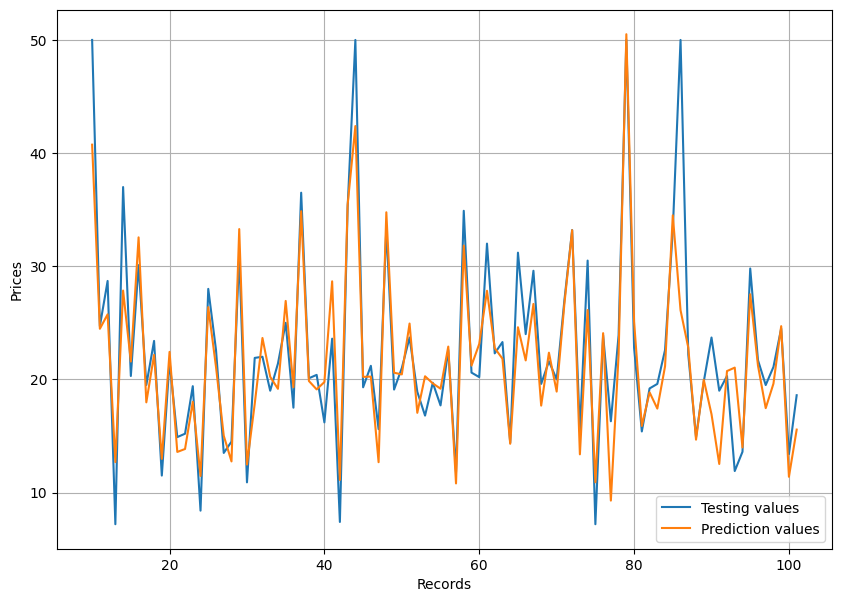

In [106]:
# Plot predictions Vs actual
plot_pred_vs_act(y_test, model_preds_6['model_6_128'], start = 10)

### Making deep learning models (Experimental randomnly made)

#### Baseline model 0

Simple neural network with 2 layers, compiled with SGD activation function and for 10 epochs

In [ ]:
from tensorflow.keras import layers

# set the random seed
tf.random.set_seed(42)

# Create the model
model_0 = tf.keras.Sequential([
    layers.Dense(20, activation='relu'),
    layers.Dense(1)
], name = 'model_0')

# Compile the model
model_0.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae', 'mse'])

# Fit the model
model_0_history = model_0.fit(X_train, y_train,
            epochs = 10,
            validation_data = (X_test, y_test),
            )

In [ ]:
model_0.summary()

In [ ]:
# Evaluate the model
model_0.evaluate(X_test, y_test)

In [ ]:
# Making a function to calculate results
def evaluate_model(model, test_data):
  x_test, y_test = test_data

  # First predict using the model
  preds = tf.squeeze(model.predict(x_test), axis=-1)
  mae = tf.keras.metrics.mae(y_test, preds).numpy()
  mse = tf.keras.metrics.mse(y_test, preds).numpy()
  rmse = tf.math.sqrt(mse).numpy()

  return {'mae': mae,
          'mse': mse,
          'rmse': rmse}

In [ ]:
# Getting model results
model_0_results = evaluate_model(model_0, (X_test, y_test))
model_0_results

In [ ]:
# Plot the loss curves
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 7))
plt.plot(pd.DataFrame(model_0_history.history['loss']))

#### Model 1: Bigger one with more layers and for more epochs with adam optimizer

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    layers.Dense(10, activation = 'relu'),
    layers.Dense(20, activation = 'relu'),
    layers.Dense(30, activation = 'relu'),
    layers.Dense(15, activation = 'relu'),
    layers.Dense(1),
], name = 'model_1')

# Compile the model
model_1.compile(loss='mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# Fit the model
model_1_history = model_1.fit(X_train, y_train,
                              epochs = 50,
                              validation_data = (X_test, y_test))

In [ ]:
# Model summary
model_1.summary()

In [ ]:
# Evaluate the model
model_1.evaluate(X_test, y_test)

In [ ]:
# Get predictions of the model
model_1_preds = model_1.predict(X_test)
model_1_preds

In [ ]:
# Get model results
model_1_results = evaluate_model(model_1, (X_test, y_test))
model_1_results

In [ ]:
# Plot the loss curves
plt.figure(figsize=(10, 7))
plt.plot(pd.DataFrame(model_1_history.history['mae']), 'g', label = 'training mae')
plt.plot(pd.DataFrame(model_1_history.history['val_mae']), 'b', label = 'val mae')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend();

#### Model 2: A much more bigger model than model_1, trained with 100 epochs

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    layers.Dense(10, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1, activation='linear'),
], name='model_2')

# Compile the model
model_2.compile(loss='mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# Fit the model
model_2_history = model_2.fit(X_train, y_train,
                              epochs = 100,
                              validation_data = (X_test, y_test))

In [ ]:
# Get the model summary
model_2.summary()

In [ ]:
# Evalaute the model
model_2.evaluate(X_test, y_test)

In [ ]:
# Get model results
model_2_results = evaluate_model(model_2, (X_test, y_test))
model_2_results

In [ ]:
# Making a function to plot the loss curves
def plot_loss_curves(history, metric = 'mae'):
  plt.figure(figsize=(10, 7))
  plt.plot(pd.DataFrame(history.history['mae']), label = 'training mae')
  plt.plot(pd.DataFrame(history.history['val_mae']), label = 'val mae')
  plt.xlabel('Epochs')
  plt.ylabel('MAE')
  plt.legend();

In [ ]:
plot_loss_curves(model_2_history, 'mae')

#### Model 3: Same model as model 2, but training with 256 epochs

In [ ]:
# Clone the model
model_3 = tf.keras.models.clone_model(model_2)
model_3._name = 'model_3'
model_3.summary()

In [ ]:
# Compiling the model
model_3.compile(loss=tf.keras.metrics.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse']
                )

# Fit the model
model_3_history = model_3.fit(X_train, y_train,
                                  epochs = 256,
                                  validation_data = (X_test, y_test))

In [ ]:
# Model summary
model_3.summary()

In [ ]:
# Get model results
model_3_results = evaluate_model(model_3, (X_test, y_test))
model_3_results

In [ ]:
model_2_results

In [ ]:
# Plot loss curves for this model
plot_loss_curves(model_3_history)

#### Model 4: Increase number of hidden units, train for 256 epochs

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='linear'),
], name = 'model_4')

# Compile the model
model_4.compile(loss='mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

# Fit the model
model_4_history = model_4.fit(X_train, y_train,
                              epochs = 256,
                              validation_data = (X_test, y_test))

In [ ]:
# Getting the model summary
model_4.summary()

In [ ]:
# Get model result
model_4_results = evaluate_model(model_4, (X_test, y_test))
model_4_results

In [ ]:
model_3_results

In [ ]:
# Plot the loss curves
plot_loss_curves(model_4_history)

#### Model 5: same model as model_4, but train for 256 epochs, with ModelCheckpoint callback to get model with best weights

In [ ]:
# Creating a model checkpoint callback
def create_model_checkpoint(save_path = 'model_exp/'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = save_path,
                                            monitor = 'val_loss',
                                            save_best_only = True,
                                            mode = 'min')

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

# set random seed
tf.random.set_seed(42)

# Clone the model_4
model_5 = tf.keras.models.clone_model(model_4)

# Compile the model
model_5.compile(loss = 'mae',
                optimizer = Adam(),
                metrics = ['mse', 'mae'])

# Fit the model
model_5_history = model_5.fit(X_train, y_train,
                              epochs = 256,
                              validation_data = (X_test, y_test),
                              callbacks = [create_model_checkpoint(save_path='model_exp/model_5')])

In [ ]:
# Get model summary
model_5.summary()

In [ ]:
# Get model results
evaluate_model(model_5, (X_test, y_test))

In [ ]:
# Load in the model with the best weights
model_5 = tf.keras.models.load_model('model_exp/model_5')

In [ ]:
# Get best weight model results
model_5_results = evaluate_model(model_5, (X_test, y_test))
model_5_results

In [ ]:
# Plot the loss curves
plot_loss_curves(model_5_history)

#### Model 6: same model as model_4, but train for 512 epochs, with early stopping and model checkpoint

In [ ]:
# Create function to create EarlyStopping callback
def create_earlystop_callback(patience = 50):
  return tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                          patience = patience,
                                          mode = 'min',
                                          verbose = 1)

In [ ]:
# Get the model
model_6 = tf.keras.models.clone_model(model_5)

# Compile the model
model_6.compile(loss='mae',
                optimizer = Adam(),
                metrics = ['mae', 'mse'])

# Fit the model
model_6_history = model_6.fit(X_train, y_train,
                              epochs = 512,
                              validation_data = (X_test, y_test),
                              callbacks = [create_model_checkpoint(save_path = 'model_exp/model_7'),
                                           create_earlystop_callback(patience = 50)])

In [ ]:
# Get the model summary
model_6.summary()

In [ ]:
# Get model results
evaluate_model(model_6, (X_test, y_test))

In [ ]:
# Get the model_6 with best weights
model_6 = tf.keras.models.load_model('model_exp/model_6')

model_6_results = evaluate_model(model_6, (X_test, y_test))
model_6_results

In [ ]:
model_5_results

In [ ]:
# Plot the loss curves
plot_loss_curves(model_6_history)

#### Model 7: Now, making a bigger model, training it on 512 epochs, with ModelCheckpoint callback

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_7 = Sequential([
    layers.Dense(32, activation = 'relu'),
    layers.Dense(128, activation = 'relu', kernel_initializer = 'he_normal'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(256, activation = 'relu', kernel_initializer = 'he_normal'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(128, activation = 'relu', kernel_initializer = 'he_normal'),
    layers.Dense(256, activation = 'relu', kernel_initializer = 'he_normal'),
    layers.Dense(128, activation = 'relu', kernel_initializer = 'he_normal'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(8, activation = 'relu'),
    layers.Dense(1, activation = 'linear'),
], name = 'model_7')

# Compile the model
model_7.compile(loss='mae',
                optimizer = Adam(learning_rate = 0.001),
                metrics = ['mae', 'mse']
                )

# Fit the model
model_7_history = model_7.fit(X_train, y_train,
                              epochs = 512,
                              validation_data = (X_test, y_test),
                              callbacks = [create_model_checkpoint(save_path = 'model_exp/model_7')])

In [ ]:
# Checking the model summary
model_7.summary()

In [ ]:
# Get model results
evaluate_model(model_7, (X_test, y_test))

In [ ]:
model_5_results

In [ ]:
model_6_results

In [ ]:
# Get model_7 with best weights
model_7 = tf.keras.models.load_model('model_exp/model_7')

# Get model results
model_7_results = evaluate_model(model_7, (X_test, y_test))
model_7_results

In [ ]:
plot_loss_curves(model_7_history)

In [ ]:
model_5.summary()

#### Model 8: Creating a simpler model, with 512 epochs, modelcheckpoint and lrRateScheduler

In [ ]:
# Create a lr scheduler
def scheduler(epoch, lr):
  return lr * (10 ** (epoch/20))

lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
# Create the model
model_8 = Sequential([
    layers.Dense(8, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'linear'),
], name = 'model_8')

# Compile the model
model_8.compile(loss = 'mae',
                optimizer = Adam(),
                metrics = ['mae', 'mse'])

model_8_history = model_8.fit(X_train, y_train,
                              epochs = 512,
                              validation_data = (X_test, y_test),
                              callbacks = [create_model_checkpoint(save_path = 'model_exp/model_8'),
                                           ])

In [ ]:
# Get model summary
model_8.summary()

In [ ]:
# Evaluate the model
evaluate_model(model_8, (X_test, y_test))

In [ ]:
# Load model with best weights
model_8 = tf.keras.models.load_model('model_exp/model_8')

# Get model_results
model_8_results = evaluate_model(model_8, (X_test, y_test))
model_8_results

In [ ]:
plot_loss_curves(model_8_history)

In [ ]:
lrs = 1e-3 * (10 ** (tf.range(512)/20))
plt.semilogx(lrs, model_8_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")